# **Download MTA Metro Data**

   Download the MTA Metro data.
https://data.ny.gov/Transportation/MTA-Subway-Hourly-Ridership-Beginning-February-202/wujg-7c2s

This data provides information about number of passengers per hour at each metro station.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**1. Data Acquisition** : Load Data



In [2]:
df = pd.read_csv('https://data.ny.gov/resource/wujg-7c2s.csv')

In [3]:
df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,georeference
0,2022-10-23T03:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,8.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
1,2022-11-09T04:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,49.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
2,2023-01-08T04:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,19.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
3,2023-02-13T00:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,15.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
4,2023-04-16T01:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,11.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-20T02:00:00.000,H023,DeKalb Av (L),BK,L,omny,3.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
996,2023-03-08T20:00:00.000,H023,DeKalb Av (L),BK,L,omny,95.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
997,2023-03-30T00:00:00.000,H023,DeKalb Av (L),BK,L,omny,15.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
998,2023-04-01T07:00:00.000,H023,DeKalb Av (L),BK,L,omny,86.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)


##**2. Data Cleaning and Preprocessing** :



### **- Understand Data**

These commands are applied to get a basic understanding of data. This will give a hig-level overview of what we're working with.

In [4]:
# Get a quick overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transit_timestamp   1000 non-null   object 
 1   station_complex_id  1000 non-null   object 
 2   station_complex     1000 non-null   object 
 3   borough             1000 non-null   object 
 4   routes              1000 non-null   object 
 5   payment_method      1000 non-null   object 
 6   ridership           1000 non-null   float64
 7   transfers           1000 non-null   float64
 8   latitude            1000 non-null   float64
 9   longitude           1000 non-null   float64
 10  georeference        1000 non-null   object 
dtypes: float64(4), object(7)
memory usage: 86.1+ KB


In [5]:
# Get the first few rows of the data
df.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,georeference
0,2022-10-23T03:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,8.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
1,2022-11-09T04:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,49.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
2,2023-01-08T04:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,19.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
3,2023-02-13T00:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,15.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)
4,2023-04-16T01:00:00.000,R529,103 St-Corona Plaza (7),Q,7,omny,11.0,0.0,40.749866,-73.862701,POINT (-73.86270141601562 40.7498664855957)


In [6]:
# Display the bottom rows of the DataFrame
df.tail()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,georeference
995,2023-01-20T02:00:00.000,H023,DeKalb Av (L),BK,L,omny,3.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
996,2023-03-08T20:00:00.000,H023,DeKalb Av (L),BK,L,omny,95.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
997,2023-03-30T00:00:00.000,H023,DeKalb Av (L),BK,L,omny,15.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
998,2023-04-01T07:00:00.000,H023,DeKalb Av (L),BK,L,omny,86.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)
999,2023-04-24T03:00:00.000,H023,DeKalb Av (L),BK,L,omny,14.0,0.0,40.703812,-73.918427,POINT (-73.91842651367188 40.70381164550781)


In [7]:
# Show the shape of the DataFrame (number of rows, number of columns)
df.shape

(1000, 11)

In [8]:
# Get the names of the columns
df.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough',
       'routes', 'payment_method', 'ridership', 'transfers', 'latitude',
       'longitude', 'georeference'],
      dtype='object')

In [9]:
# Provide summary statistics of the DataFrame's numerical columns:
df.describe()


,ridership,transfers,latitude,longitude
count,1000.000000,1000.0,1000.000000,1000.000000
mean,28.882000,0.0,40.740502,-73.949820
std,63.771442,0.0,0.081026,0.048172
min,1.000000,0.0,40.577621,-74.023376
25%,4.000000,0.0,40.670849,-73.984634
50%,10.000000,0.0,40.743134,-73.956871
75%,26.000000,0.0,40.810474,-73.918434
max,958.000000,0.0,40.893192,-73.768173


In [10]:
# Count the number of non-NA/null values per column:
# นับเฉพาะข้อมูลที่ไม่เป็น null
df.count()

transit_timestamp     1000
station_complex_id    1000
station_complex       1000
borough               1000
routes                1000
payment_method        1000
ridership             1000
transfers             1000
latitude              1000
longitude             1000
georeference          1000
dtype: int64

In [11]:
# Frequency count for categorical columns
# มีหมวดหมู่อะไรบ้างในคอลัมน์นี้
print(df['borough'].unique())

['Q' 'M' 'BK' 'BX']


In [12]:
# นับ value
print(df['borough'].value_counts())

M     371
BK    349
BX    170
Q     110
Name: borough, dtype: int64


In [13]:
print(df['station_complex'].unique())
print(df['station_complex'].value_counts())

['103 St-Corona Plaza (7)' '104 St (A)' '104 St (J,Z)' '116 St (6)'
 '116 St (B,C)' '125 St (1)' '125 St (2,3)' '125 St (A,B,C,D)'
 '135 St (2,3)' '135 St (B,C)' '137 St-City College (1)'
 '14 St-Union Sq (L,N,Q,R,W,4,5,6)' '145 St (A,B,C,D)'
 '15 St-Prospect Park (F,G)' '155 St (B,D)' '155 St (C)' '157 St (1)'
 '163 St-Amsterdam Av (C)' '167 St (B,D)' '168 St (A,C,1)' '170 St (B,D)'
 '174 St (2,5)' '175 St (A)' '23 St (6)' '233 St (2,5)' '25 Av (D)'
 '3 Av (L)' '3 Av-138 St (6)' '33 St (6)' '36 St (D,N,R)'
 '4 Av (F,G)/9 St (R)' '45 St (R)' '46 St-Bliss St (7)' '49 St (N,R,W)'
 '5 Av-53 St (E,M)' '57 St (F)' '57 St-7 Av (N,Q,R,W)' '59 St (N,R)'
 '63 Dr-Rego Park (M,R)' '66 St-Lincoln Center (1)' '69 St (7)'
 '7 Av (B,D,E)' '7 Av (F,G)' '72 St (Q)' '75 Av (E,F)'
 '75 St-Elderts Ln (J,Z)' '77 St (6)' '86 St (1)' '86 St (N)' '96 St (6)'
 'Alabama Av (J)' 'Astor Place (6)' 'Atlantic Av (L)' 'Bay 50 St (D)'
 'Bay Ridge Av (R)' 'Baychester Av (5)' 'Beach 36 St (A)'
 'Beach 60 St (A)' 'Bedfo

Then drop some unrelated/uninterested columns.

In [14]:
df = df.drop('payment_method', axis=1)
df.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough',
       'routes', 'ridership', 'transfers', 'latitude', 'longitude',
       'georeference'],
      dtype='object')

In [15]:
df = df.drop('station_complex_id', axis =1)
df.columns

Index(['transit_timestamp', 'station_complex', 'borough', 'routes',
       'ridership', 'transfers', 'latitude', 'longitude', 'georeference'],
      dtype='object')

In [16]:
df = df.drop('georeference', axis=1)
df.columns

Index(['transit_timestamp', 'station_complex', 'borough', 'routes',
       'ridership', 'transfers', 'latitude', 'longitude'],
      dtype='object')

### **- Handle Missing Data**

Inspect missing data and fill/drop those values, depending on the nature of the data.

In [17]:
# Check for missing data
# นับว่ามีข้อมูลที่ขาดหายหรือไม่
df.isnull().sum()

transit_timestamp    0
station_complex      0
borough              0
routes               0
ridership            0
transfers            0
latitude             0
longitude            0
dtype: int64

In [18]:
# If there's missing data, decide how to handle it
# แถวที่ข้อมูลขาดหาย ให้ทำการ drop ทั้งแถว
df = df.dropna()
# This will drop rows with missing data
df = df.fillna(value=7) # This will fill missing data with a specific value

#for this case, there is not NA data.

ตัวอย่างคำสั่งกรณีเติมค่า null ด้วย ค่าเฉลี่ยของข้อมูลใน column_name

In [19]:
# Fill missing values with mean of the column.
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# คำสั่ง inplace=True คือ ก่อให้เกิดการเปลี่ยนแปลงลงไปในตัว df ทันที
# ถ้าไม่ใส่ inplace=True จะต้อง เอา df = df['column_name'].fillna(df['column_name'].mean())

In [20]:
# Alternatively, drop rows with missing values.
df.dropna(inplace=True)

### **- Handle Duplicate Data**

Inspect duplicated data in rows, and drop since these data can affect analysis.

In [21]:
df.duplicated().sum()  # Counts the number of duplicate rows.

0

In [22]:
df.drop_duplicates(inplace=True)  # Drops the duplicate rows.

### **- Correct Data Types**

Ensure all columns are in the correct data type.

If they’re not, you will need to convert them by using astype command .

In [23]:
df.columns

Index(['transit_timestamp', 'station_complex', 'borough', 'routes',
       'ridership', 'transfers', 'latitude', 'longitude'],
      dtype='object')

In [24]:
# เปลี่ยนให้เป็น datetime
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

# สกัดเอาแค่ ชั่วโมง เก็บไว้ที่ field hour
df['hour'] = df['transit_timestamp'].dt.hour
# สกัดเอาแค่ dayofweek เก็บไว้ที่ field dayofweek
df['day_of_week'] = df['transit_timestamp'].dt.dayofweek
# สกัดเอาแค่ เดือน เก็บไว้ที่ field month
df['month'] = df['transit_timestamp'].dt.month

In [25]:
df.columns

Index(['transit_timestamp', 'station_complex', 'borough', 'routes',
       'ridership', 'transfers', 'latitude', 'longitude', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [26]:
df['transit_timestamp'].head()

0   2022-10-23 03:00:00
1   2022-11-09 04:00:00
2   2023-01-08 04:00:00
3   2023-02-13 00:00:00
4   2023-04-16 01:00:00
Name: transit_timestamp, dtype: datetime64[ns]

In [27]:
# ได้ ชั่วโมง
df['hour'].head()

0    3
1    4
2    4
3    0
4    1
Name: hour, dtype: int64

In [28]:
# Monday คือ 0
# Tuesday คือ 1
# Wednesday คือ 2
# Thursday คือ 3
# Friday คือ 4
# Saturday คือ 5
# Sunday คือ 6
df['day_of_week'].head()

0    6
1    2
2    6
3    0
4    6
Name: day_of_week, dtype: int64

In [29]:
df['transfers'].tail()

995    0.0
996    0.0
997    0.0
998    0.0
999    0.0
Name: transfers, dtype: float64

In [30]:
df.transit_timestamp.max()

Timestamp('2023-09-11 00:00:00')

In [31]:
df.transit_timestamp.min()

Timestamp('2022-02-09 02:00:00')

In [32]:
# Set the start and end dates
start_date = '2022-06-14 00:00:00'
end_date = '2023-06-14 00:00:00'

In [33]:
# Filter the data between the start and end dates
# เงื่อนไข
mask = (df['transit_timestamp'] >= start_date) & (df['transit_timestamp'] < end_date)
filtered_df = df.loc[mask]
print(filtered_df)

      transit_timestamp          station_complex borough routes  ridership  \
0   2022-10-23 03:00:00  103 St-Corona Plaza (7)       Q      7        8.0   
1   2022-11-09 04:00:00  103 St-Corona Plaza (7)       Q      7       49.0   
2   2023-01-08 04:00:00  103 St-Corona Plaza (7)       Q      7       19.0   
3   2023-02-13 00:00:00  103 St-Corona Plaza (7)       Q      7       15.0   
4   2023-04-16 01:00:00  103 St-Corona Plaza (7)       Q      7       11.0   
..                  ...                      ...     ...    ...        ...   
995 2023-01-20 02:00:00            DeKalb Av (L)      BK      L        3.0   
996 2023-03-08 20:00:00            DeKalb Av (L)      BK      L       95.0   
997 2023-03-30 00:00:00            DeKalb Av (L)      BK      L       15.0   
998 2023-04-01 07:00:00            DeKalb Av (L)      BK      L       86.0   
999 2023-04-24 03:00:00            DeKalb Av (L)      BK      L       14.0   

     transfers   latitude  longitude  hour  day_of_week  month 

In [34]:
df = filtered_df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transit_timestamp  649 non-null    datetime64[ns]
 1   station_complex    649 non-null    object        
 2   borough            649 non-null    object        
 3   routes             649 non-null    object        
 4   ridership          649 non-null    float64       
 5   transfers          649 non-null    float64       
 6   latitude           649 non-null    float64       
 7   longitude          649 non-null    float64       
 8   hour               649 non-null    int64         
 9   day_of_week        649 non-null    int64         
 10  month              649 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 60.8+ KB


In [35]:
backup_df = df

Encode Categorical Data

In [36]:
print(df['routes'].unique())

['7' 'A' 'J,Z' '6' 'C,B' '3,2' 'C,B,A,D' '5,N,R,Q,4,L,W,6' 'F,G' 'B,D' 'C'
 'C,1,A' '2,5' 'D' 'L' 'N,R,D' 'F,R,G,' 'N,R,W' 'M,E' 'F' 'N,R,Q,W' 'N,R'
 'M,R' '1' 'E,B,D' 'Q' 'F,E' 'N' 'J' 'R' '5' 'G' 'Q,B' '4' 'R,W' 'M,E,G,7']


In [38]:
# One-hot encoding creates a new column for each unique value in the column.
df = pd.get_dummies(df, columns=['routes'])

In [39]:
df.columns

Index(['transit_timestamp', 'station_complex', 'borough', 'ridership',
       'transfers', 'latitude', 'longitude', 'hour', 'day_of_week', 'month',
       'routes_1', 'routes_2,5', 'routes_3,2', 'routes_4', 'routes_5',
       'routes_5,N,R,Q,4,L,W,6', 'routes_6', 'routes_7', 'routes_A',
       'routes_B,D', 'routes_C', 'routes_C,1,A', 'routes_C,B',
       'routes_C,B,A,D', 'routes_D', 'routes_E,B,D', 'routes_F', 'routes_F,E',
       'routes_F,G', 'routes_F,R,G,', 'routes_G', 'routes_J', 'routes_J,Z',
       'routes_L', 'routes_M,E', 'routes_M,E,G,7', 'routes_M,R', 'routes_N',
       'routes_N,R', 'routes_N,R,D', 'routes_N,R,Q,W', 'routes_N,R,W',
       'routes_Q', 'routes_Q,B', 'routes_R', 'routes_R,W'],
      dtype='object')

In [40]:
# สร้าง DataFrame ใหม่
df_one_encode = pd.DataFrame()
# สร้างอีก 3 columns เอาข้อมูลมาจาก df
df_one_encode['routes_1'] = df['routes_1'].head(10)
df_one_encode['routes_6'] = df['routes_6'].head(10)
df_one_encode['routes_L'] = df['routes_L'].head(10)

In [41]:
df_one_encode

,routes_1,routes_6,routes_L
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
8,0,0,0
9,0,0,0
10,0,0,0


ตัวอย่างการทำ one-hot encoding

In [42]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

# define example
values = np.array(['cold', 'cold', 'warm', 'cold', 'hot', 'hot', \
                   'warm', 'cold', 'warm', 'hot'])

print("Data: ", values)

Data:  ['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [47]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
# 0 แทน cold | 1 แทน hot | 2 แทน warm
print("Label Encoder:" ,integer_encoded)

Label Encoder: [0 0 2 0 1 1 2 0 2 1]


In [48]:
# onehot encode
onehot_encoder = OneHotEncoder(sparse_output=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
# [1. 0. 0.] แทน cold | [0. 1. 0.] แทน hot | [0. 0. 1.] แทน warm
print("OneHot Encoder:", onehot_encoded)

OneHot Encoder: [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


คล้ายๆ กับหน้านี้

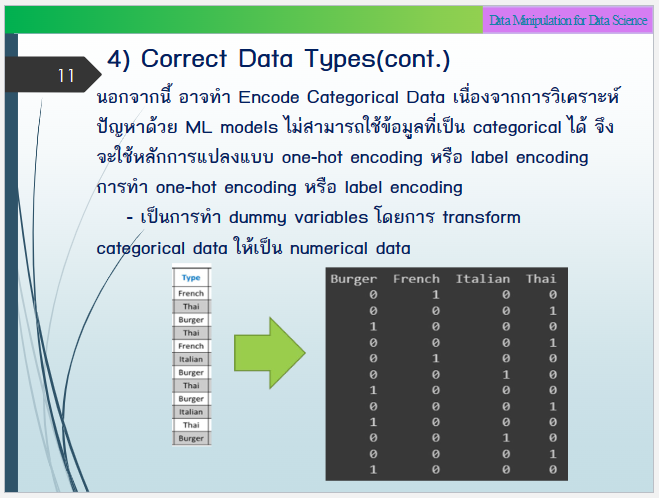

In [49]:
#Binary encode
lb = LabelBinarizer()
print("Label Binarizer:", lb.fit_transform(values))

Label Binarizer: [[1 0 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 0]]


### **- Handle Outliers**

In [50]:
# Using Z-score to identify outliers from scipy
from scipy import stats

z_scores = stats.zscore(df[['ridership', 'transfers']])
z_scores

,ridership,transfers
0,-0.310944,NaN
1,0.286795,NaN
2,-0.150575,NaN
3,-0.208891,NaN
4,-0.267207,NaN
...,...,...
995,-0.383839,NaN
996,0.957429,NaN
997,-0.208891,NaN
998,0.826218,NaN


In [55]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

<ipython-input-55-4093e017b572>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


In [64]:
df

,transit_timestamp,station_complex,borough,routes,ridership,transfers,latitude,longitude,hour,day_of_week,month
0,2022-10-23 03:00:00,103 St-Corona Plaza (7),Q,7,8.0,0.0,40.749866,-73.862701,3,6,10
1,2022-11-09 04:00:00,103 St-Corona Plaza (7),Q,7,49.0,0.0,40.749866,-73.862701,4,2,11
2,2023-01-08 04:00:00,103 St-Corona Plaza (7),Q,7,19.0,0.0,40.749866,-73.862701,4,6,1
3,2023-02-13 00:00:00,103 St-Corona Plaza (7),Q,7,15.0,0.0,40.749866,-73.862701,0,0,2
4,2023-04-16 01:00:00,103 St-Corona Plaza (7),Q,7,11.0,0.0,40.749866,-73.862701,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-20 02:00:00,DeKalb Av (L),BK,L,3.0,0.0,40.703812,-73.918427,2,4,1
996,2023-03-08 20:00:00,DeKalb Av (L),BK,L,95.0,0.0,40.703812,-73.918427,20,2,3
997,2023-03-30 00:00:00,DeKalb Av (L),BK,L,15.0,0.0,40.703812,-73.918427,0,3,3
998,2023-04-01 07:00:00,DeKalb Av (L),BK,L,86.0,0.0,40.703812,-73.918427,7,5,4


In [57]:
df.shape

(0, 46)

Remove Outliers

In [62]:
df = backup_df

In [58]:
# Use the IQR to filter out outliers.
Q1 = df['ridership'].quantile(0.25)
Q3 = df['ridership'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['ridership'] >= Q1 - 1.5 * IQR) & (df['ridership'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]

In [59]:
print(Q1, Q3)

nan nan


In [60]:
print(df)

Empty DataFrame
Columns: [transit_timestamp, station_complex, borough, ridership, transfers, latitude, longitude, hour, day_of_week, month, routes_1, routes_2,5, routes_3,2, routes_4, routes_5, routes_5,N,R,Q,4,L,W,6, routes_6, routes_7, routes_A, routes_B,D, routes_C, routes_C,1,A, routes_C,B, routes_C,B,A,D, routes_D, routes_E,B,D, routes_F, routes_F,E, routes_F,G, routes_F,R,G,, routes_G, routes_J, routes_J,Z, routes_L, routes_M,E, routes_M,E,G,7, routes_M,R, routes_N, routes_N,R, routes_N,R,D, routes_N,R,Q,W, routes_N,R,W, routes_Q, routes_Q,B, routes_R, routes_R,W]
Index: []

[0 rows x 46 columns]


ตัวอย่างการ plot Heatmap of Ridership by Hour and Day of Week

Visualize the interaction of two categorical variables. Here, we can create a heatmap of average ridership by hour of day and day of week.

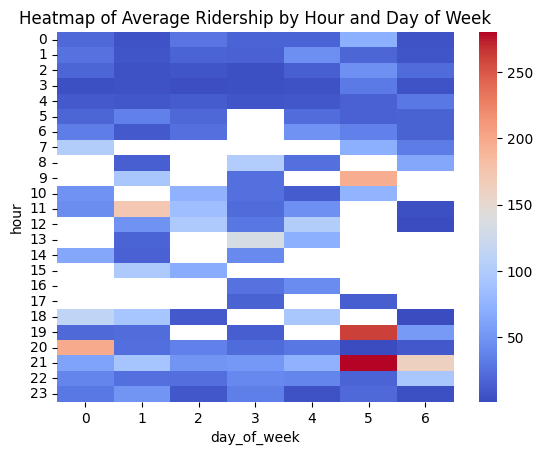

In [63]:
pivot_table = df.pivot_table(values='ridership', index='hour', \
                             columns='day_of_week', aggfunc='mean')
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Heatmap of Average Ridership by Hour and Day of Week')
plt.show()